In [42]:
import pandas as pd

ccba = pd.read_csv('Dataset/public_train_x_ccba_full_hashed.csv')
cdtx = pd.read_csv('Dataset/public_train_x_cdtx0001_full_hashed.csv')
custinfo = pd.read_csv('Dataset/public_train_x_custinfo_full_hashed.csv')
dp = pd.read_csv('Dataset/public_train_x_dp_full_hashed.csv')
remit = pd.read_csv('Dataset/public_train_x_remit1_full_hashed.csv')
public_alert_date = pd.read_csv('Dataset/public_x_alert_date.csv')
train_alert_date = pd.read_csv('Dataset/train_x_alert_date.csv')
train_y_answer = pd.read_csv('Dataset/train_y_answer.csv')
sample = pd.read_csv('Dataset/sample_submission.csv')

## Preprocess

In [43]:
import pickle
import numpy as np
import pandas as pd

In [44]:
#combine customer info with dates
date = pd.concat([public_alert_date, train_alert_date], axis=0)
custinfo = custinfo.merge(date, on='alert_key', how='left')
custinfo = custinfo.merge(train_y_answer, on='alert_key', how='left')
custinfo

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7,365,NaN
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2,365,NaN
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7,365,NaN
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5,365,NaN
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5,365,NaN
...,...,...,...,...,...,...,...,...
25746,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364,0.0
25747,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364,0.0
25748,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0.0
25749,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364,0.0


In [45]:
# functions for cleaning up data depending on numerical or categorical

def process_numerical(col):
    col = np.nan_to_num(col, nan=0)
    return col

def process_categorical(col):
    col.fillna('NULL', inplace=True)
    map_dict = {v:i for i, v in enumerate(set(col.unique()))}
    col = col.map(map_dict)
    return col

In [46]:
#cleanup ccba
cols = ccba.columns 
numericals = []
numericals.extend([cols[1],cols[3],cols[4],cols[5],cols[6],cols[7],cols[8],cols[9]])

ccba[numericals] = process_numerical(ccba[numericals].copy())
ccba['data_source'] = 'ccba'

In [47]:
#cleanup cdtx
cdtx = pd.read_csv('Dataset/public_train_x_cdtx0001_full_hashed.csv')
cols = cdtx.columns
numericals = []
categoricals = []
numericals.append(cols[4])
categoricals.extend([cols[2],cols[3]])

cdtx[numericals] = process_numerical(cdtx[numericals].copy())
for category in categoricals:
    cdtx[category] = process_categorical(cdtx[category].copy())
cdtx['data_source'] = 'cdtx'

In [48]:
#cleanup dp
cols = dp.columns
numericals = []
categoricals = []
numericals.extend([cols[5],cols[6]])
categoricals.extend([cols[1],cols[3],cols[4],cols[7],cols[8],cols[9],cols[10],cols[11]])

print(dp)
dp[numericals] = process_numerical(dp[numericals].copy())
for category in categoricals:
    dp[category] = process_categorical(dp[category].copy())
dp['data_source'] = 'dp'

                                                   cust_id debit_credit  \
0        0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR   
1        0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR   
2        0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR   
3        0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR   
4        0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR   
...                                                    ...          ...   
1969813  fff94defcc33daab190e702926d583f6d805294354addb...           CR   
1969814  fff94defcc33daab190e702926d583f6d805294354addb...           CR   
1969815  fff94defcc33daab190e702926d583f6d805294354addb...           CR   
1969816  fff94defcc33daab190e702926d583f6d805294354addb...           DB   
1969817  fff94defcc33daab190e702926d583f6d805294354addb...           DB   

         tx_date  tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  \
0             36      

In [49]:
#cleanup remit
cols = remit.columns
numericals = []
categoricals = []
numericals.extend([cols[3]])
categoricals.extend([cols[2]])

remit[numericals] = process_numerical(remit[numericals].copy())
for category in categoricals:
    remit[category] = process_categorical(remit[category].copy())
remit['data_source'] = 'remit'

In [50]:
#cleanup custinfo
cols = custinfo.columns
numericals = []
categoricals = []
numericals.extend([cols[4]])
categoricals.extend([cols[2],cols[3],cols[5],cols[7]])

custinfo[numericals] = process_numerical(custinfo[numericals].copy())
for category in categoricals:
    custinfo[category] = process_categorical(custinfo[category].copy())
custinfo['data_source'] = 'custinfo'

In [51]:
print(custinfo)

       alert_key                                            cust_id  \
0         352249  82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...   
1         352253  b212d14cb35676926682b2cf849e295d948888f556c07e...   
2         352254  e5b0002791c7852644a2730abeaa893cdf14a072ef7812...   
3         352280  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...   
4         352282  0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...   
...          ...                                                ...   
25746     352123  b600c0720096c241f5aec16b096c6a353492eee8a5855a...   
25747     352124  06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...   
25748     352125  0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...   
25749     352128  ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...   
25750     352132  c49b33d1fde790ec03584672903f296e486615adfdc989...   

       risk_rank  occupation_code  total_asset  AGE  date  sar_flag  \
0              1               19    1465816.0    7   365         2   
1    

In [52]:
def get_date(d):
    ds = d['data_source']
    if ds == 'ccba':
        date = d['byymm']
    elif ds == 'cdtx':
        date = d['date']
    elif ds == 'dp':
        date = d['tx_date']
    elif ds == 'remit':
        date = d['trans_date']
    elif ds == 'custinfo':
        date = d['date']
    return date, ds

In [53]:
import numpy as np
datas = [ccba, cdtx, dp, remit, custinfo]
datas_grouped = [d.groupby(by='cust_id') for d in datas]
cust_ids = custinfo.cust_id.unique()
save_data = dict()
for cust_id in cust_ids:
    # get all data from each group
    cust_data = []
    for d in datas_grouped:
        if not cust_id in d.groups:
            continue
        cust_data += d.get_group(cust_id).to_dict('records')
    for i in range(len(cust_data)):
        cust_data[i] = dict(cust_data[i])
    
    # sort by date
    cust_data.sort(key=get_date)
    
    # generate source list and target_mask
    source_list = []
    train_mask = []
    test_mask = []
    for i, c in enumerate(cust_data):
        ds = c['data_source']
        source_list.append(ds)
        if ds != 'custinfo':
            pass
        elif np.isnan(c['sar_flag']):
            test_mask.append(i)
        else:
            train_mask.append(i)
#     cust_data = np.asarray(cust_data)
    # save data
#     save_data[cust_id] = dict({
#         'sources': source_list,
#         'train_mask': train_mask,
#         'test_mask': test_mask,
#         'cust_data': cust_data,
#     })

    save_data[cust_id] = dict({
    'cust_data': cust_data,
    })

In [55]:
print(custinfo.iloc[0]['cust_id'])

82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a8542c040b98feb8bd1


In [56]:
print(save_data['82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a8542c040b98feb8bd1'])

{'cust_data': [{'cust_id': '82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a8542c040b98feb8bd1', 'debit_credit': 0, 'tx_date': 0, 'tx_time': 13, 'tx_type': 1, 'tx_amt': 6108.0, 'exchg_rate': 28.555, 'info_asset_code': 20, 'fiscTxId': 29, 'txbranch': 349, 'cross_bank': 0, 'ATM': 1, 'data_source': 'dp'}, {'cust_id': '82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a8542c040b98feb8bd1', 'debit_credit': 1, 'tx_date': 0, 'tx_time': 18, 'tx_type': 1, 'tx_amt': 87041.0, 'exchg_rate': 4.337, 'info_asset_code': 20, 'fiscTxId': 29, 'txbranch': 349, 'cross_bank': 0, 'ATM': 1, 'data_source': 'dp'}, {'cust_id': '82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a8542c040b98feb8bd1', 'debit_credit': 1, 'tx_date': 0, 'tx_time': 14, 'tx_type': 1, 'tx_amt': 90172.0, 'exchg_rate': 28.495, 'info_asset_code': 20, 'fiscTxId': 29, 'txbranch': 349, 'cross_bank': 0, 'ATM': 1, 'data_source': 'dp'}, {'cust_id': '82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a8542c040b98feb8bd1', 'debit_credit': 1, 'tx_date': 0, 'tx_time':

In [67]:
no_sar = custinfo[custinfo['sar_flag'] == 0]['cust_id']
# print(dp[dp['cust_id'].isin(no_sar.values)])
no_sar_dp = dp[dp['cust_id'].isin(no_sar.values)]

sar_1 = custinfo[custinfo['sar_flag'] == 1]['cust_id']
# print(dp[dp['cust_id'].isin(sar_1.values)])
sar_1_dp = dp[dp['cust_id'].isin(sar_1.values)]

sar_2 = custinfo[custinfo['sar_flag'] == 2]['cust_id']
# print(dp[dp['cust_id'].isin(sar_2.values)])
sar_2_dp = dp[dp['cust_id'].isin(sar_2.values)]

<AxesSubplot: title={'center': 'transaction type no sar distribution'}>

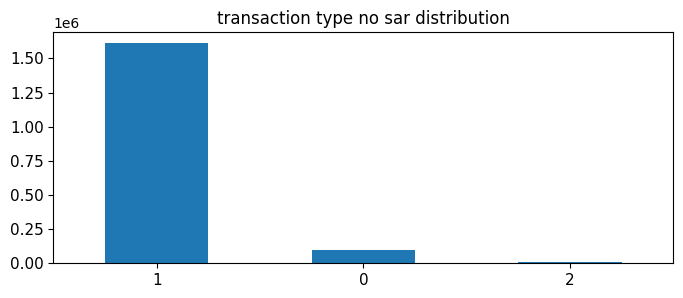

In [68]:
no_sar_dp.tx_type.value_counts().plot(kind = 'bar',
                                    title = 'transaction type no sar distribution',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

<AxesSubplot: title={'center': 'transaction type sar 1 distribution'}>

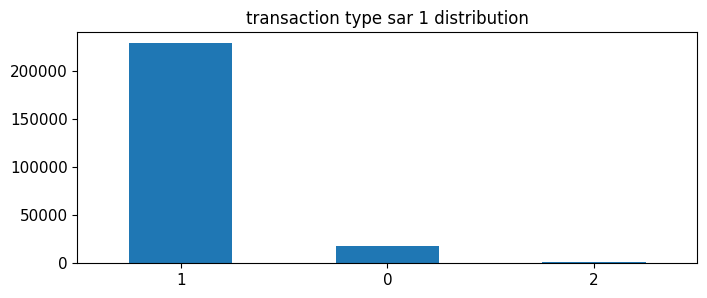

In [69]:
sar_1_dp.tx_type.value_counts().plot(kind = 'bar',
                                    title = 'transaction type sar 1 distribution',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

<AxesSubplot: title={'center': 'transaction type sar 2 distribution'}>

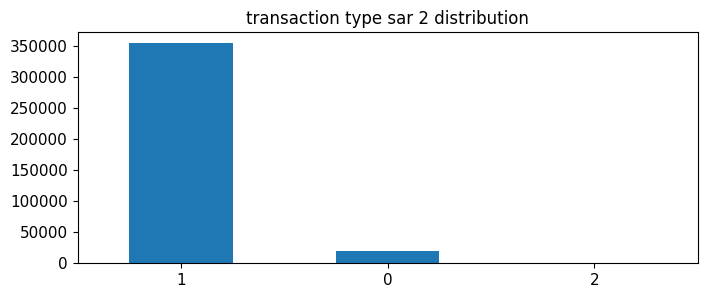

In [70]:
sar_2_dp.tx_type.value_counts().plot(kind = 'bar',
                                    title = 'transaction type sar 2 distribution',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [71]:
print(remit)

                                                 cust_id  trans_date  \
0      01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         148   
1      01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         165   
2      01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         231   
3      01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         291   
4      01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         389   
...                                                  ...         ...   
17162  ff6c1217b5e039fda46bf4dfba2d54291154a1db54c677...         244   
17163  ff6c1217b5e039fda46bf4dfba2d54291154a1db54c677...         284   
17164  ff6c1217b5e039fda46bf4dfba2d54291154a1db54c677...         298   
17165  ff6c1217b5e039fda46bf4dfba2d54291154a1db54c677...         316   
17166  ff6c1217b5e039fda46bf4dfba2d54291154a1db54c677...         386   

       trans_no  trade_amount_usd data_source  
0             0          100528.0       remit  
1             0          100528.0      

In [87]:
remit['sar_flag'] = np.where(remit['cust_id'].isin(sar_1.values), 1, remit['sar_flag'])
remit['sar_flag'] = np.where(remit['cust_id'].isin(sar_2.values), 2, remit['sar_flag'])

<AxesSubplot: title={'center': 'remit no sar distribution'}, xlabel='sar_flag', ylabel='trade_amount_usd'>

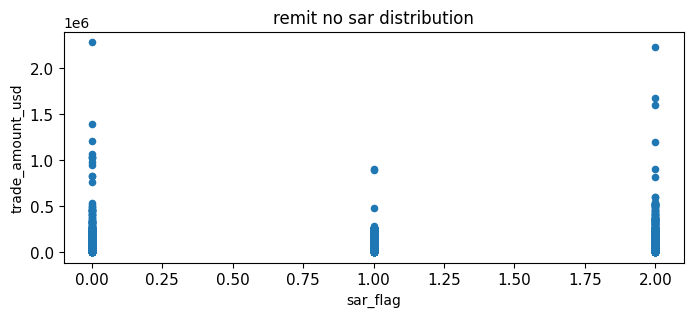

In [88]:
remit.plot(kind = 'scatter',
           title = 'remit no sar distribution',
           x = 'sar_flag', y = 'trade_amount_usd',
           rot = 0, fontsize = 11, figsize = (8,3))

In [96]:
remit[(remit['trade_amount_usd'] > 500000) & (remit['sar_flag'] == 1)] #2
remit[(remit['trade_amount_usd'] > 500000) & (remit['sar_flag'] == 2)] #20

,cust_id,trans_date,trans_no,trade_amount_usd,data_source,sar_flag
975,332fe46096cc1f7bee84dc063f17d58ccf51be2dbeca7e...,385,4,1673488.0,remit,2
2624,7ea8d681ee9394e27e6064d23d0918ae9b67d1b21dbae9...,167,4,521424.0,remit,2
2648,7ea8d681ee9394e27e6064d23d0918ae9b67d1b21dbae9...,249,4,521424.0,remit,2
2649,7ea8d681ee9394e27e6064d23d0918ae9b67d1b21dbae9...,250,4,521424.0,remit,2
2650,7ea8d681ee9394e27e6064d23d0918ae9b67d1b21dbae9...,251,4,521424.0,remit,2
2653,7ea8d681ee9394e27e6064d23d0918ae9b67d1b21dbae9...,253,4,511497.0,remit,2
2654,7ea8d681ee9394e27e6064d23d0918ae9b67d1b21dbae9...,256,4,521424.0,remit,2
2655,7ea8d681ee9394e27e6064d23d0918ae9b67d1b21dbae9...,257,4,521424.0,remit,2
2683,7ea8d681ee9394e27e6064d23d0918ae9b67d1b21dbae9...,287,4,597286.0,remit,2
2685,7ea8d681ee9394e27e6064d23d0918ae9b67d1b21dbae9...,288,4,542636.0,remit,2
